In [48]:
import pandas as pd
import glob
import pymysql
from matplotlib import pyplot as plt
%matplotlib inline

connection = pymysql.connect(host='kidup-production.c5gkrouylqmw.eu-central-1.rds.amazonaws.com',
                             user='kidup_148161251',
                             password='knop0602R',
                             db='kidup',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

### Page view per hour of a day on the website

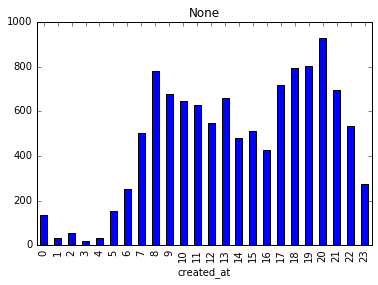

In [51]:
df = pd.read_sql_query("select * from tracking_event where type = 'page_view' and source=1 and country='DK'", connection)
df['created_at'] = pd.to_datetime(df['created_at'],unit='s')
df.created_at.groupby(df.created_at.dt.hour).count().plot(kind="bar", subplots=True)
plt.show()

### Page view per hour of a day in the app

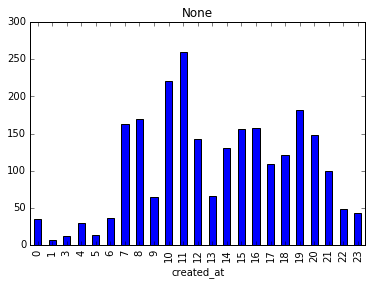

In [59]:
df = pd.read_sql_query("select * from tracking_event where type = 'page_view' and source=2 and country='DK'", connection)
df['created_at'] = pd.to_datetime(df['created_at'],unit='s')
df.created_at.groupby(df.created_at.dt.hour).count().plot(kind="bar", subplots=True)
plt.show()

### Sorted page views per city

In [74]:
df = pd.read_sql_query("select count(1) as cnt, city from tracking_event where type = 'page_view' and source=1 and country='DK' group by city having count(1) > 25", connection)
df.sort(columns="cnt", ascending=False)

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,cnt,city
0,4234,None
4,1284,Birker?d
8,1152,Copenhagen
12,523,Frederiksberg
2,494,Aarhus
27,143,Kolding
28,137,Odense
1,103,?lborg
30,96,Roskilde
39,90,Vanl?se
